In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 50
energy = pd.read_csv(r'C:\Users\reza\SkyDrive\Documents\Data Science\Data Incubator\Global Energy\all_energy_statistics.csv')

In [57]:
USA = energy[energy['country_or_area'] == 'United States']
USA

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
128,United States,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",2484.0,NaN,additives_and_oxygenates
129,United States,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",2640.0,NaN,additives_and_oxygenates
130,United States,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",2579.0,NaN,additives_and_oxygenates
131,United States,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",2506.0,NaN,additives_and_oxygenates
132,United States,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",2497.0,NaN,additives_and_oxygenates
133,United States,Additives and Oxygenates - Exports,2009,"Metric tons, thousand",2213.0,NaN,additives_and_oxygenates
134,United States,Additives and Oxygenates - Exports,2008,"Metric tons, thousand",2038.0,NaN,additives_and_oxygenates
135,United States,Additives and Oxygenates - Exports,2007,"Metric tons, thousand",3121.0,NaN,additives_and_oxygenates
136,United States,Additives and Oxygenates - Exports,2006,"Metric tons, thousand",3153.0,NaN,additives_and_oxygenates
137,United States,Additives and Oxygenates - Exports,2005,"Metric tons, thousand",1818.0,NaN,additives_and_oxygenates


In [58]:
USA_coal = USA[(USA['commodity_transaction'].str.contains('Hard coal')) \
               | (USA['commodity_transaction'].str.contains('Anthracite')) \
               | (USA['commodity_transaction'].str.contains('Coking coal')) \
               | (USA['commodity_transaction'].str.contains('Other bituminous coal')) \
               | (USA['commodity_transaction'].str.contains('Brown coal')) \
               | (USA['commodity_transaction'].str.contains('Sub-bituminous coal')) \
               | (USA['commodity_transaction'].str.contains('Lignite')) \
               | (USA['commodity_transaction'].str.contains('Peat')) \
               | (USA['commodity_transaction'].str.contains('Oil shale / Oil sands')) \
               | (USA['commodity_transaction'].str.contains('Coke oven coke')) \
               | (USA['commodity_transaction'].str.contains('Gas coke')) \
               | (USA['commodity_transaction'].str.contains('Patent fuel')) \
               | (USA['commodity_transaction'].str.contains('Brown coal briquettes')) \
               | (USA['commodity_transaction'].str.contains('Peat products')) \
               | (USA['commodity_transaction'].str.contains('Coal tar')) \
               | (USA['commodity_transaction'].str.contains('Other coal products'))]
USA_coal = USA_coal[USA_coal['quantity'] < 10000000]
USA_coal_yearly = USA_coal.groupby(['year']).sum()
USA_coal_yearly

,quantity,quantity_footnotes
year,,
1990,8786779.0,0.0
1991,8659477.0,0.0
1992,8636127.0,0.0
1993,8649100.0,0.0
1994,8998781.0,0.0
1995,9043633.0,0.0
1996,9407399.0,0.0
1997,9648501.0,0.0
1998,9786821.0,0.0


Text(0.5, 1.0, 'US Coal Production')

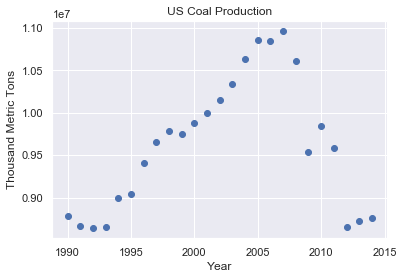

In [89]:
plt.plot(USA_coal_yearly.index, USA_coal_yearly['quantity'], 'bo')
plt.xlabel('Year')
plt.ylabel('Thousand Metric Tons')
plt.title('US Coal Production')

Text(0.5, 1.0, 'US Natural Gas Production')

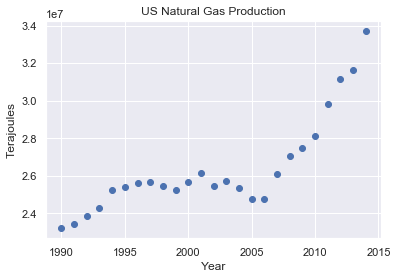

In [87]:
USA_natural_gas = USA[(USA['commodity_transaction'].str.contains('Natural gas')) \
                     & (USA['commodity_transaction'].str.contains('production')) \
                     & (USA['commodity_transaction'].str.contains('Memo'))]

USA_natural_gas_yearly = USA_natural_gas.groupby(['year']).sum()
#USA_natural_gas_yearly
plt.plot(USA_natural_gas_yearly.index, USA_natural_gas_yearly['quantity'], 'bo')
plt.xlabel('Year')
plt.ylabel('Terajoules')
plt.title('US Natural Gas Production')